In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import DataFrame, Series

path = '/Users/ary00/Documents/Project3/'

trainData = pd.read_csv(path + 'WakeCountyHousing.csv')

In [2]:
trainData

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308287,482492,0.19,440000,3/1/2021,March 2021,2021,2020,2020,2814,Other,Conventional,3 Bath,ALL,Holly Springs,27540.0
308288,482495,0.19,464000,3/17/2021,March 2021,2021,2020,2020,3129,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0
308289,482496,0.19,431000,3/30/2021,March 2021,2021,2020,2020,2801,Other,Conventional,3 Bath,ALL,Holly Springs,27540.0
308290,483428,4.42,100000,3/8/2021,March 2021,2021,1901,1901,833,One Story,Conventional,1 Bath,E,Raleigh,27614.0


### Cleaning the Data

In [3]:
trainData = trainData.drop("Month_Year_of_Sale", axis=1)
trainData = trainData.drop("Total_Sale_Date", axis=1)
trainData = trainData.drop("Bath", axis=1)
trainData = trainData.drop("Physical_City", axis=1)
trainData = trainData.drop("Real_Estate_Id", axis=1)
trainData = trainData.dropna()

In [4]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306178 entries, 0 to 308291
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Deeded_Acreage    306178 non-null  float64
 1   Total_Sale_Price  306178 non-null  int64  
 2   Year_of_Sale      306178 non-null  int64  
 3   Year_Built        306178 non-null  int64  
 4   Year_Remodeled    306178 non-null  int64  
 5   Heated_Area       306178 non-null  int64  
 6   Num_Stories       306178 non-null  object 
 7   Design_Style      306178 non-null  object 
 8   Utilities         306178 non-null  object 
 9   Physical_Zip      306178 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 25.7+ MB


In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(trainData, test_size=0.2, random_state=42)

In [6]:
train_set_copy = train_set.drop("Total_Sale_Price", axis=1)
train_set_copy_labels = train_set["Total_Sale_Price"].copy()

train_set_copy1 = train_set.drop("Num_Stories", axis=1)
train_set_copy_labels1 = train_set["Num_Stories"].copy()

train_set_copy_labels

125071    298000
139393    479000
156111    120000
239713    258500
21521     110000
           ...  
120249    166000
260948    470000
132368    297000
147395      6500
122339    270000
Name: Total_Sale_Price, Length: 244942, dtype: int64

### Scaling/Normalizing Features

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])


### Custom Transformer using Ordinal Encoder

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

cat_attribs1 = ["Design_Style", "Utilities"]
num_attribs1 = ["Deeded_Acreage", "Year_of_Sale", "Year_Built", "Year_Remodeled", "Heated_Area", "Physical_Zip"]

full_pipeline1 = ColumnTransformer([
        ("num", num_pipeline, num_attribs1),
        ("cat", OrdinalEncoder(), cat_attribs1),
    ],
    remainder='passthrough')

train_set_copy_prepared1 = full_pipeline1.fit_transform(train_set_copy1)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

cat_attribs = ["Num_Stories", "Design_Style", "Utilities"]
num_attribs = ["Deeded_Acreage", "Year_of_Sale", "Year_Built", "Year_Remodeled", "Heated_Area", "Physical_Zip"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ],
    remainder='passthrough')

train_set_copy_prepared = full_pipeline.fit_transform(train_set_copy)

In [10]:
train_set_copy_prepared
newest_df = pd.DataFrame(train_set_copy_prepared)
newest_df

,0,1,2,3,4,5,6,7,8
0,-0.125698,0.706407,0.053775,0.012462,-0.246969,0.973243,1.0,4.0,0.0
1,0.282261,0.611530,0.205577,0.166974,1.394579,0.973243,2.0,4.0,0.0
2,-0.227688,0.991039,-0.604038,-0.657089,-1.259626,0.758027,0.0,2.0,0.0
3,-0.202191,0.326898,0.610385,0.579006,0.001172,-1.418048,1.0,13.0,0.0
4,-0.095101,-1.380892,-1.464255,-1.532657,-0.839695,0.877591,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
244937,-0.120599,-0.811629,0.003174,-0.039042,-0.148517,-1.035442,1.0,4.0,0.0
244938,-0.095101,0.896161,0.812789,0.785022,1.400606,-0.796312,1.0,4.0,0.0
244939,-0.069604,-1.286015,0.003174,-0.039042,0.757650,-1.418048,1.0,4.0,0.0
244940,-0.202191,0.137144,0.154976,0.115470,-0.826635,0.758027,1.0,13.0,0.0


### Decision Tree Regressor & Mean Squared Error

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_copy_prepared, train_set_copy_labels)

train_set_copy_predictions = tree_reg.predict(train_set_copy_prepared)
tree_mse = mean_squared_error(train_set_copy_labels, train_set_copy_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


3262.6559335800644

### K-fold Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_set_copy_prepared, train_set_copy_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [13]:
def display_scores(scores):
...     print("Scores:", scores)
...     print("Mean:", scores.mean())
...     print("Standard deviation:", scores.std())
...
>>> display_scores(tree_rmse_scores)


Scores: [108516.42063946 104748.24123042 110344.20040723 100129.5641706
 107167.23621918 108234.02994486 105400.89965511 100712.15565578
 100313.65054392 108880.35848613]
Mean: 105444.67569526963
Standard deviation: 3653.137013391719


### Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_set_copy_prepared, train_set_copy_labels)

price_predictions = forest_reg.predict(train_set_copy_prepared)
forest_mse = mean_squared_error(train_set_copy_labels, price_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

27648.837121650235

### SGDClassifier & Accuracy Score Evaluation

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

some_data = train_set_copy_prepared1[:50]
some_labels = train_set_copy_labels1[:50]

some_data1 = train_set_copy_prepared1[50:]
some_labels1 = train_set_copy_labels1[50:]

clf = SGDClassifier(loss="log", penalty="l2", max_iter=1000)
clf.fit(some_data1, some_labels1)
y_pred = clf.predict(some_data)
print('Accuracy of SGD Classifier: {:.2f}'.format(accuracy_score(some_labels, y_pred)))
y_pred

Accuracy of SGD Classifier: 0.50


array(['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other'], dtype='<U9')

### One vs Rest Classifier

In [16]:
some_data = train_set_copy_prepared1[:50]
some_labels = train_set_copy_labels1[:50]

some_data1 = train_set_copy_prepared1[50:]
some_labels1 = train_set_copy_labels1[50:]

OvR_clf = OneVsRestClassifier(LogisticRegression())
OvR_clf.fit(some_data1, some_labels1)

y_pred = OvR_clf.predict(some_data)

print('Accuracy of OvR Classifier: {:.2f}'.format(accuracy_score(some_labels, y_pred)))
y_pred

Accuracy of OvR Classifier: 0.50


array(['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other'], dtype='<U9')

### One vs One Classifier

In [17]:
some_data = train_set_copy_prepared1[:50]
some_labels = train_set_copy_labels1[:50]

some_data1 = train_set_copy_prepared1[50:]
some_labels1 = train_set_copy_labels1[50:]

OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(some_data1, some_labels1)

y_pred = OvO_clf.predict(some_data)

print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(some_labels, y_pred)))
y_pred

Accuracy of OvO Classifier: 0.50


array(['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other'], dtype=object)

### K-Neighbors Classifier & Evaluating on Test Data

In [18]:
from sklearn.neighbors import KNeighborsClassifier

some_data = train_set_copy_prepared1[:50]
some_labels = train_set_copy_labels1[:50]

some_data1 = train_set_copy_prepared1[50:]
some_labels1 = train_set_copy_labels1[50:]

classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(some_data1, some_labels1)
y_pred = classifier.predict(some_data)

print('Accuracy of KNeighbors Classifier: {:.2f}'.format(accuracy_score(some_labels, y_pred)))
y_pred

Accuracy of KNeighbors Classifier: 0.72


array(['Other', 'Other', 'One Story', 'Other', 'One Story', 'Other',
       'Other', 'One Story', 'Other', 'Other', 'Other', 'Other', 'Other',
       'One Story', 'Other', 'One Story', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'One Story', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'One Story', 'One Story', 'Other', 'One Story',
       'One Story', 'One Story', 'One Story', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'One Story', 'Other'], dtype=object)

### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(some_labels, y_pred)

array([[12,  9,  0],
       [ 1, 24,  0],
       [ 0,  4,  0]], dtype=int64)

### Grid Search CV

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(train_set_copy_prepared, train_set_copy_labels)

grid_search.best_params_


{'max_features': 4, 'n_estimators': 30}

In [21]:
final_model = grid_search.best_estimator_

some_data = train_set_copy_prepared[:5]
some_labels = train_set_copy_labels[:5]

final_predictions = final_model.predict(some_data)

final_mse = mean_squared_error(some_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

6000.264733388719

### Stratified K-fold Cross Validation

In [34]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
lst_accu_stratified = []

train_set_copy_prepared=pd.DataFrame(train_set_copy_prepared)

for train_index, test_index in skf.split(train_set_copy_prepared, train_set_copy_labels):
    x_train_fold, x_test_fold = train_set_copy_prepared.iloc[train_index], train_set_copy_prepared.iloc[test_index]
    y_train_fold, y_test_fold = train_set_copy_labels.iloc[train_index], train_set_copy_labels.iloc[test_index]
    classifier.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(classifier.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


C:\Users\ary00\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


List of possible accuracy: [0.01704076883507116, 0.016918290860693554]

Maximum Accuracy That can be obtained from this model is: 1.7040768835071158 %

Minimum Accuracy: 1.6918290860693554 %

Overall Accuracy: 1.6979529847882355 %

Standard Deviation is: 8.66050062283972e-05


### ROC Curve

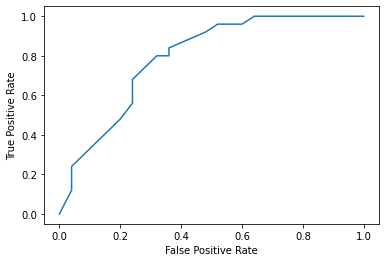

In [54]:
from sklearn import metrics

x_test = train_set_copy_prepared1[:50]
y_test = train_set_copy_labels1[:50]
    
x_train = train_set_copy_prepared1[50:]
y_train = train_set_copy_labels1[50:]

classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(x_train, y_train)

y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Other')

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Bootstrap Aggregating (Ensemble Method)

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

bagging.fit(x_train, y_train)

y_pred = bagging.predict(x_test)
print('Accuracy of Bagging Classifier: {:.2f}'.format(accuracy_score(y_test, y_pred)))
y_pred

Accuracy of KNeighbors Classifier: 0.72


array(['Other', 'Other', 'One Story', 'Other', 'One Story', 'Other',
       'Other', 'One Story', 'One Story', 'Other', 'Other', 'Other',
       'Other', 'One Story', 'Other', 'One Story', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'One Story', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Other', 'One Story', 'One Story', 'Other',
       'One Story', 'One Story', 'Other', 'One Story', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'One Story', 'Other'],
      dtype=object)

### Gradient Boosting Classifier (Ensemble Method)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(x_train, y_train)
print('Accuracy of Gradient Boosting Classifier: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Gradient Boosting Classifier: 0.78


### Extra Trees Classifier (Ensemble Method)

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
                           min_samples_split=2, random_state=0).fit(x_train, y_train)
print('Accuracy of Extra Trees Classifier: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Extra Trees Classifier: 0.84


### Ada Boost Classifier (Ensemble Method)

In [63]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_train, y_train)
print('Accuracy of Extra Trees Classifier: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Extra Trees Classifier: 0.78
